# Educational Attainment of Foster Youth: Outcomes for Children in State Care
-----------------------------------------------------------

## Introduction
--------------------

According to the National Data Archive on Child Abuse and Neglect (NDACAN),  each year, about 10% of children who exit foster care are discharged each year due to having reached the states age limit for eligibility. These children are at increased risk of unemployment, criminal conviction, substance abuse, lower educational attainment, homelessness, and poor mental health in adulthood (Child Abuse and Neglect, 2011).  A positive K-12 education experience has the potential to be a powerful counterweight to the abuse, neglect, separation, impermanence and other barriers these vulnerable children experience. 

Participation in and persistence to a postsecondary credential can enhance the foster youths well-being, help them make more successful transitions to adulthood, and increase their chances for personal fulfillment and economic self-sufficiency. National research shows that children in foster care are at high risk of dropping out of school and are unlikely to attend or graduate from college. My analysis is intended to help look into the services provided by the Chafee Act and determine whether this support is enough to improve the educational outcomes for foster youth.

The John H. Chafee Foster Care Independence Act of 1999 provided states with flexible funding intended to serve youth at risk of exiting foster care without permanency, and required that states track the services received by youth as well as youth outcomes. The data system developed to meet this requirement is referred to as National Youth in Transition Database (NYTD). 

## Client
-----------
Analyzing the educational outcomes and the services utilized by the foster youth can play an invaluable role in helping to highlight and better assess child welfare services and programs.

## Dataset
-------------
 - National Youth in Transition Database (NYTD) Outcomes File, FY 2011- 2016
NYTD outcomes database collects information about current and former foster youth as the youth transition from foster care to independence. Foster youth who turned 17 years old in Federal Fiscal Year (FFY) 2011 participated in the first-ever NYTD survey, and were followed up when they reached 19  years of age (in FFY 2013).

- National Youth in Transition Database (NYTD) Service File, FY 2011- 2016
NYTD services database collects information on all youth who receive at least one independent living skills service paid for or provided by a Chafee funded county or agency, regardless of their foster care status and regardless of their age. This is the Services population.


- Adoption and Foster Care Analysis and Reporting System (AFCARS) Annual File, FY 2000 - Present
AFCARS collects case-level information on all children in foster care for whom State child welfare agencies have responsibility of placement, care, or supervision and on children who are adopted under the auspices of the State's public child welfare agency.

The data used for my project were made available by the National Data Archive on Child Abuse and Neglect (NDACAN), Cornell University, Ithaca, NY, and have been used with permission. Data from the NYTD and AFCARS were originally collected by the states and provided to the Children’s Bureau. Funding for the project was provided by the Children’s Bureau, Administration on Children, Youth and Families, Administration for Children and Families, U.S. Department of Health and Human Services. The collector of the original data, the funder, the Archive, Cornell University and their agents or employees bear no responsibility for the analyses or interpretations presented here.


## Data Collection and Wrangling
-----------------------------------------
Before performing exploratory analysis, we must clean the data first. Analysis performed with Python.

1) Import STATA files as a Pandas DataFrame

In [305]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [306]:
# import NYTD Services file as a Pandas DataFrame
nytd_services = pd.io.stata.read_stata('NYTD Services 2011-2016.dta')

nytd_services.head()

,fy,stfips,st,repdate,recnumbr,dob,sex,amiakn,asian,blkafram,...,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,stfcid,race,raceethn,agemp
0,2013,1,AL,201309,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",14
1,2014,1,AL,201409,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",15
2,2015,1,AL,201509,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",16
3,2011,1,AL,201109,000000014871,1996-08-15,Female,No,No,Yes,...,No,No,No,No,No,No,AL000000014871,Black Only,"NH, Black Only",14
4,2012,1,AL,201209,000000014871,1996-08-15,Female,No,No,Yes,...,No,No,No,No,No,No,AL000000014871,Black Only,"NH, Black Only",15


In [307]:
# import NYTD Outcomes file as a Pandas DataFrame
nytd_outcomes = pd.io.stata.read_stata('Cohort14W2.dta')

nytd_outcomes.head()

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


2) Check for missing values:

In [308]:
nytd_services.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022724 entries, 0 to 1022723
Data columns (total 39 columns):
fy            1022724 non-null int16
stfips        1022724 non-null int8
st            1022724 non-null object
repdate       1022724 non-null object
recnumbr      1022724 non-null object
dob           1022724 non-null object
sex           1022724 non-null category
amiakn        1022724 non-null category
asian         1022724 non-null category
blkafram      1022724 non-null category
hawaiipi      1022724 non-null category
white         1022724 non-null category
raceunkn      1022724 non-null category
racedcln      1022724 non-null category
hisorgin      1022724 non-null category
fcstatsv      1022724 non-null category
lclfipssv     1022724 non-null category
tribesv       1022724 non-null category
delinqntsv    1022724 non-null category
edlevlsv      1022724 non-null category
specedsv      1022724 non-null category
ilnasv        1022724 non-null category
acsuppsv      1022724 

In [309]:
nytd_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40262 entries, 0 to 40261
Data columns (total 47 columns):
wave           40262 non-null category
stfcid         40262 non-null object
stfips         40262 non-null int8
st             40262 non-null object
recnumbr       40262 non-null object
repdate        40262 non-null object
dob            40262 non-null object
sex            40262 non-null category
amiakn         40262 non-null category
asian          40262 non-null category
blkafram       40262 non-null category
hawaiipi       40262 non-null category
white          40262 non-null category
raceunkn       40262 non-null category
racedcln       40262 non-null category
hisorgin       40262 non-null category
outcmrpt       40262 non-null category
outcmdte       40262 non-null object
outcmfcs       40262 non-null category
currfte        40262 non-null category
currpte        40262 non-null category
emplysklls     40262 non-null category
socsecrty      40262 non-null category
educaid   

No missing entries from both NYTD Datasets.

In [310]:
# Number of unique child ID that received services (RecNumbr = AFCARS Unique Child ID)
nytd_services['recnumbr'].nunique()

324463

In [311]:
# Foster Care Status - Services
fc = nytd_services.loc[nytd_services['fcstatsv'] == 'Yes, received services & was in FC']
fc['recnumbr'].nunique()

261588

- Number of youth in foster care receiving services (2011-2016): 261,588
- Number of youth no longer in foster care and still receiving services (2011-2016): 62,875

In [312]:
# Number of unique child IDs that participated in the baseline survey at age 17 (RecNumbr = AFCARS Unique Child ID)
nytd_outcomes['recnumbr'].nunique()

23781

In [313]:
# Create filtered DataFrame for wave 1 - Age 17 Baseline Survey
wave_1 = nytd_outcomes.loc[nytd_outcomes['wave'] == 'Age 17 Baseline Survey']
wave_1

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
5,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
6,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
7,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
8,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
9,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


In [314]:
# Create filtered DataFrame for wave 2 - Age 19 Followup
wave_2 = nytd_outcomes.loc[nytd_outcomes['wave'] == 'Age 19 Followup']
wave_2

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23781,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23782,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23783,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23784,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,yes,do not know,not applicable,not applicable,yes,yes,yes,no,no,yes
23785,Age 19 Followup,AL000000199584,1,AL,000000199584,201609,1997-04-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23786,Age 19 Followup,AL000000203185,1,AL,000000203185,201603,1997-03-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23787,Age 19 Followup,AL000000203921,1,AL,000000203921,201609,1997-05-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23788,Age 19 Followup,AL000000206382,1,AL,000000206382,201609,1997-07-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23789,Age 19 Followup,AL000000206479,1,AL,000000206479,201609,1997-09-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23790,Age 19 Followup,AL000000208296,1,AL,000000208296,201603,1997-01-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes


69% of wave 1(age 17 baseline) survey participants also completed the the wave 2 (age 19 followup) survey.

In [315]:
# Foster Youth at 17 - Currently in Foster Care (22,545)
wave_1.loc[wave_1['outcmfcs'] == 'yes']

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
5,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
6,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
7,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
8,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
9,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


95% of the 17 year olds that filled out the wave 1 survey, said they are in foster care.

In [316]:
# Foster Youth at 19 - Currently in Foster Care (4,909)
current_youth = wave_2.loc[wave_2['outcmfcs'] == 'yes']
current_youth

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23783,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23784,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,yes,do not know,not applicable,not applicable,yes,yes,yes,no,no,yes
23785,Age 19 Followup,AL000000199584,1,AL,000000199584,201609,1997-04-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23786,Age 19 Followup,AL000000203185,1,AL,000000203185,201603,1997-03-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23789,Age 19 Followup,AL000000206479,1,AL,000000206479,201609,1997-09-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23790,Age 19 Followup,AL000000208296,1,AL,000000208296,201603,1997-01-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23791,Age 19 Followup,AL000000209854,1,AL,000000209854,201603,1997-01-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23792,Age 19 Followup,AL000000210509,1,AL,000000210509,201609,1997-06-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23793,Age 19 Followup,AL000000210770,1,AL,000000210770,201609,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23794,Age 19 Followup,AL000000213077,1,AL,000000213077,201609,1997-09-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes


30% of the 19 year olds that filled out the wave 2 survey, said they are in foster care.

## Exploratory Data Analysis
------------------------------------

1) What is the education status of former youth by state?

In [317]:
# Former Youth at 19, OutcmFCS = Foster Care Status at Outcomes Collection
former_youth = wave_2.loc[wave_2['outcmfcs'] == 'no']
former_youth

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23781,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23782,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23787,Age 19 Followup,AL000000203921,1,AL,000000203921,201609,1997-05-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23788,Age 19 Followup,AL000000206382,1,AL,000000206382,201609,1997-07-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23796,Age 19 Followup,AL000000219475,1,AL,000000219475,201603,1997-03-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23797,Age 19 Followup,AL000000220526,1,AL,000000220526,201609,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23800,Age 19 Followup,AL000000221359,1,AL,000000221359,201609,1997-09-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23803,Age 19 Followup,AL000000230092,1,AL,000000230092,201609,1997-09-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23804,Age 19 Followup,AL000000236271,1,AL,000000236271,201609,1997-09-15,female,no,no,...,blank,blank,blank,blank,yes,yes,yes,no,no,no
23806,Age 19 Followup,AL000000237467,1,AL,000000237467,201609,1997-07-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes


In [318]:
# Group by current education enrollment (CurrEnroll) and state (st), count and sort values from highest to lowest
pd.options.display.max_rows
pd.set_option("display.max_rows",184)
former_youth.groupby(['currenroll','st']).size()

currenroll  st
no          AK     26
            AL     47
            AR     24
            CA    357
            CO     43
            CT     37
            DC      2
            DE     21
            FL     94
            GA     62
            HI     10
            IA     84
            ID     23
            IL     12
            IN     24
            KS    138
            KY     61
            LA     79
            MA     46
            MD     17
            ME      2
            MI     89
            MN     55
            MO     59
            MS     34
            MT     24
            NC     60
            ND     17
            NE     72
            NH     17
            NJ     69
            NM     14
            NV     44
            NY     47
            OH     88
            OK     79
            OR     34
            PA     84
            PR     24
            RI     34
            SC     60
            SD     27
            TN     78
            TX    109
            UT   

In [319]:
# Group former youth by current education enrollment (CurrEnroll) 
former_youth.groupby('currenroll').size()

currenroll
no          2886
yes         2313
declined     177
blank       6195
dtype: int64

### Current Enrollment And Attendance (CurrEnroll)

“Yes” means the youth is enrolled in and attending high school, GED classes, or postsecondary vocational training or college, as of the date of the outcome data collection. A youth is still considered enrolled in and attending school if the youth would otherwise be enrolled in and attending a school that is currently out of session.

“Declined” means the youth did not answer this question.


- Former Foster Youth Enrolled and Attending School: 2,313
- Former Foster Youth Not Enrolled and Attending School: 2,886
- Unknown Education Status of Former Foster Youth (Either declined or left question blank): 6,372


#### 44% of former youth who answered this question said they are enrolled and attending school. More than half of former youth said they are not enrolled in school. 
#### ** This does not include the 6,372 that left this question blank.

2) Are the youth in foster care enrolled and attending school?

In [320]:
# Group current youth by current education enrollment (CurrEnroll) 
current_youth.groupby('currenroll').size()

currenroll
no          1152
yes         2345
declined      57
blank       1355
dtype: int64

#### Better education outcome from youth who are in foster care

- Current Foster Youth Enrolled and Attending School: 2,345
- Current Foster Youth Not Enrolled and Attending School: 1,152
- Unknown Education Status of Current Foster Youth (Either declined or left question blank): 1,412

#### 67% of current youth who answered this question said they are enrolled and attending school. 33% are not enrolled in schoool
#### ** This does not include the1,412 that left this question blank.

3) What is the highest level of education received by a majority of former youth?

In [321]:
# Group former youth by Highest Educational Certification Received (HighEdCert)
former_youth.groupby('highedcert').size().sort_values(ascending = False)

highedcert
blank                     6206
high school or ged        3013
none of the above         2072
declined                   155
vocational certificate      73
vocational license          36
associate degree             8
higher degree                6
bachelor degree              2
dtype: int64

### Highest Educational Certification Received (HighEdCert)

A youth has received an education certificate if the youth has a high school diploma or general equivalency degree (GED), vocational certificate, vocational license, associate’s degree (e.g., A.A.), bachelor’s degree (e.g., B.A. or B.S.), or a higher degree as of the date of the outcome data collection. Indicate the highest degree that the youth has received.

- Highest Level of Education by Most Former Foster Youth: High School or GED
- A high number of youth participants did not answer this question (blank or declined): 6,361
- 125 out of 5195 (Not including blank entries) have a postsecondary vocational training or college education.


4) Explore the relationship between educational status and services (e.g., Post-secondary educational support)

In [322]:
# List column names from wave_2 and nytd_services dataframe
wave_2_cols = wave_2.columns.tolist()
# print(wave_2_cols)

nytd_serv_cols = nytd_services.columns.tolist()
# print(nytd_serv_cols)

# combine both list (col names from each dataframe) and drop duplicate column names
cols_to_use = list(wave_2_cols)
cols_to_use.extend(x for x in nytd_serv_cols if x not in cols_to_use)
print(cols_to_use)
# dfNew = merge(df, df2[cols_to_use], left_index=True, right_index=True, how='outer')

['wave', 'stfcid', 'stfips', 'st', 'recnumbr', 'repdate', 'dob', 'sex', 'amiakn', 'asian', 'blkafram', 'hawaiipi', 'white', 'raceunkn', 'racedcln', 'hisorgin', 'outcmrpt', 'outcmdte', 'outcmfcs', 'currfte', 'currpte', 'emplysklls', 'socsecrty', 'educaid', 'pubfinas', 'pubfoodas', 'pubhousas', 'othrfinas', 'highedcert', 'currenroll', 'cnctadult', 'homeless', 'subabuse', 'incarc', 'children', 'marriage', 'medicaid', 'othrhlthin', 'medicalin', 'mentlhlthin', 'prescripin', 'baseline', 'fy14cohort', 'elig19', 'samplestate', 'insample', 'responded', 'fy', 'fcstatsv', 'lclfipssv', 'tribesv', 'delinqntsv', 'edlevlsv', 'specedsv', 'ilnasv', 'acsuppsv', 'psedsuppsv', 'careersv', 'emplytrsv', 'budgetsv', 'housedsv', 'hlthedsv', 'famsuppsv', 'mentorsv', 'silsv', 'rmbrdfasv', 'educfinasv', 'othrfinasv', 'race', 'raceethn', 'agemp']


In [323]:
# Merge NYTD Wave 2 survey outcomes to NYTD Services Dataset
df = pd.merge(wave_2, nytd_services, on='stfcid', how='left')
df

,wave,stfcid,stfips_x,st_x,recnumbr_x,repdate_x,dob_x,sex_x,amiakn_x,asian_x,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
1,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",15
2,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",16
3,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
4,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
5,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,No,No,Yes,No,No,No,No,Black Only,"NH, Black Only",16
6,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,No,No,Yes,No,No,No,No,Black Only,"NH, Black Only",18
7,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
8,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,Yes,No,Black Only,"NH, Black Only",16
9,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,Yes,Yes,Black Only,"NH, Black Only",18


In [324]:
# Drop duplicate Child IDs
df = df.drop_duplicates(['stfcid'])
df

,wave,stfcid,stfips_x,st_x,recnumbr_x,repdate_x,dob_x,sex_x,amiakn_x,asian_x,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
3,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
4,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
7,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
10,Age 19 Followup,AL000000199584,1,AL,000000199584,201609,1997-04-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",14
14,Age 19 Followup,AL000000203185,1,AL,000000203185,201603,1997-03-15,male,no,no,...,No,No,Yes,No,No,No,No,White Only,"NH, White Only",14
17,Age 19 Followup,AL000000203921,1,AL,000000203921,201609,1997-05-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Age 19 Followup,AL000000206382,1,AL,000000206382,201609,1997-07-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Age 19 Followup,AL000000206479,1,AL,000000206479,201609,1997-09-15,male,no,no,...,No,No,Yes,No,No,No,No,Black Only,"NH, Black Only",17
20,Age 19 Followup,AL000000208296,1,AL,000000208296,201603,1997-01-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",13


In [325]:
# Drop duplicate columns (e.g: recnumbr_x and recnumber_y)

# define our drop function
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)

drop_y(df)
df

# func to rename '_x' cols
def rename_x(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)
rename_x(df)
df

/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,wave,stfcid,stfips,st,recnumbr,repdate,dob,se,amiakn,asian,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
3,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
4,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
7,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
10,Age 19 Followup,AL000000199584,1,AL,000000199584,201609,1997-04-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",14
14,Age 19 Followup,AL000000203185,1,AL,000000203185,201603,1997-03-15,male,no,no,...,No,No,Yes,No,No,No,No,White Only,"NH, White Only",14
17,Age 19 Followup,AL000000203921,1,AL,000000203921,201609,1997-05-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Age 19 Followup,AL000000206382,1,AL,000000206382,201609,1997-07-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Age 19 Followup,AL000000206479,1,AL,000000206479,201609,1997-09-15,male,no,no,...,No,No,Yes,No,No,No,No,Black Only,"NH, Black Only",17
20,Age 19 Followup,AL000000208296,1,AL,000000208296,201603,1997-01-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",13


The joined dataframe contains the services and 19 year old foster followup survey outcomes.

In [326]:
# Eliminate rows containing null values (NaN)
df.dropna()


,wave,stfcid,stfips,st,recnumbr,repdate,dob,se,amiakn,asian,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
3,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
4,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
7,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
10,Age 19 Followup,AL000000199584,1,AL,000000199584,201609,1997-04-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",14
14,Age 19 Followup,AL000000203185,1,AL,000000203185,201603,1997-03-15,male,no,no,...,No,No,Yes,No,No,No,No,White Only,"NH, White Only",14
19,Age 19 Followup,AL000000206479,1,AL,000000206479,201609,1997-09-15,male,no,no,...,No,No,Yes,No,No,No,No,Black Only,"NH, Black Only",17
20,Age 19 Followup,AL000000208296,1,AL,000000208296,201603,1997-01-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",13
24,Age 19 Followup,AL000000209854,1,AL,000000209854,201603,1997-01-15,male,no,no,...,Yes,No,No,No,No,Yes,No,Black Only,"NH, Black Only",17
25,Age 19 Followup,AL000000210509,1,AL,000000210509,201609,1997-06-15,female,no,no,...,No,No,No,No,No,Yes,Yes,Black Only,"NH, Black Only",15


In [327]:
#Set index to Recnumbr (Unique Child ID)
df.set_index('recnumbr')

,wave,stfcid,stfips,st,repdate,dob,se,amiakn,asian,blkafram,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
recnumbr,,,,,,,,,,,,,,,,,,,,,
000000046332,Age 19 Followup,AL000000046332,1,AL,201603,1996-10-15,male,no,no,yes,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
000000193079,Age 19 Followup,AL000000193079,1,AL,201603,1996-10-15,male,no,no,yes,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
000000195457,Age 19 Followup,AL000000195457,1,AL,201603,1996-10-15,male,no,no,yes,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
000000198581,Age 19 Followup,AL000000198581,1,AL,201609,1997-04-15,female,no,no,yes,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
000000199584,Age 19 Followup,AL000000199584,1,AL,201609,1997-04-15,male,no,no,yes,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",14
000000203185,Age 19 Followup,AL000000203185,1,AL,201603,1997-03-15,male,no,no,no,...,No,No,Yes,No,No,No,No,White Only,"NH, White Only",14
000000203921,Age 19 Followup,AL000000203921,1,AL,201609,1997-05-15,female,no,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000206382,Age 19 Followup,AL000000206382,1,AL,201609,1997-07-15,female,no,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000206479,Age 19 Followup,AL000000206479,1,AL,201609,1997-09-15,male,no,no,yes,...,No,No,Yes,No,No,No,No,Black Only,"NH, Black Only",17


5) Which services are utlilized the most?

- SpecEdSv: Special Education
- ILNAsv: Independent Living Needs Assessment
- AcSuppSv: Academic Support
- PSEdSuppSv: Post-Secondary Educational Support
- CareerSv: Career Preparation
- EmplyTrSv: Employment Programs Or Vocational
- BudgetSv: Budget And Financial Management
- HousEdSv: Housing Education And Home
- HlthEdSv: Health Education And Risk Prevention
- FamSuppSv: Family Support And Healthy Marriage
- MentorSv: Mentoring
- SILsv: Supervised Independent Living
- RmBrdFASv: Room And Board Financial Assistance
- EducFinASv: Education Financial Assistance
- OthrFinaSv: Other Financial Assistance

In [376]:
# List of NYTD services 
cols = ['specedsv', 'ilnasv', 'acsuppsv', 'psedsuppsv', 'careersv', 'emplytrsv', 'budgetsv', 'housedsv', 'hlthedsv', 'famsuppsv', 'mentorsv', 'silsv', 'rmbrdfasv', 'educfinasv', 'othrfinasv']

# Create list comprehension to count activity for each service and append to list of services
services = [ df.groupby(col).size() for col in cols ]

# Concatenate list of services into a dataframe
services_df = pd.concat(services, axis=1, keys=cols)

# Remove index name
services_df.index.name = None

print(services_df)

       specedsv  ilnasv  acsuppsv  psedsuppsv  careersv  emplytrsv  budgetsv  \
No         7977    5192      5876        9124      7809       9116      7826   
Yes        2502    5320      4636        1388      2703       1396      2686   
Blank       374     341       341         341       341        341       341   

       housedsv  hlthedsv  famsuppsv  mentorsv  silsv  rmbrdfasv  educfinasv  \
No         7656      7347       8199      8764   9923       9652        9534   
Yes        2856      3165       2313      1748    590        860         978   
Blank       341       341        341       341    340        341         341   

       othrfinasv  
No           8290  
Yes          2222  
Blank         341  


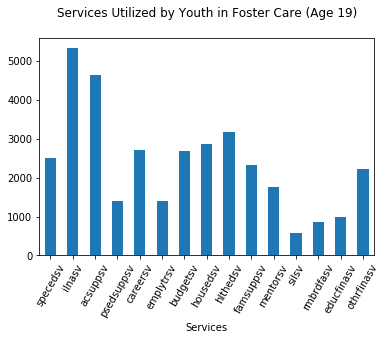

In [393]:
# Compare the services used by 16,481 19 year old foster children
yes = services_df.iloc[1]

yes.plot(kind='bar', align='center', rot=60)
plt.xlabel('Services')
plt.title('Services Utilized by Youth in Foster Care (Age 19)\n')
plt.show()

##### Top 3 services used by foster youth (age 19):
------------------------------------------
- Independent Living Needs Assessment
- Academic Support
- Health Education And Risk Prevention

acsuppsv      4636
psedsuppsv    1388
educfinasv     978
Name: Yes, dtype: int64


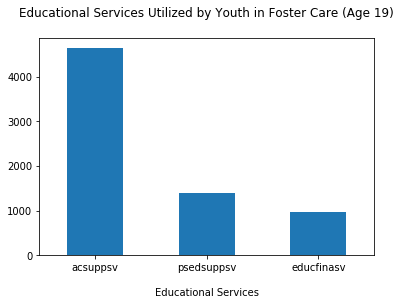

In [401]:
# Compare the educational services used by 16,481 19 year old foster children
edu_servs = services_df.loc['Yes',['acsuppsv','psedsuppsv', 'educfinasv']]
print(edu_servs)

edu_servs.plot(kind='bar', rot=0)
plt.xlabel('\nEducational Services')
plt.title('Educational Services Utilized by Youth in Foster Care (Age 19)\n')
plt.show()

- 4,636 foster youth at age 19 received academic support such as couseling, studying for an exam, help with homework, etc...

- 42% of foster youth at age 19 are receiving educational support (Academic, Post-secondary, and Financial)

*** Not including blank responses 